# By MrJGan

## Last update : 10/30/2020

# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# load my data
da = pd.read_csv(r'C:\Users\J\nhanes_2015_2016.csv.txt')

# Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [3]:
# Relabel the martial status variable DMDMARTL.
da['DMDMARTL'] = da.DMDMARTL.replace({1: 'Married', 2: 'Widowed', 3: 'Divorced', 4: 'Separated',\
5: 'Never married', 6: 'Living with partner', 77: 'Refused', 99: 'Don\'t Know'})

In [4]:
# Remove all missing values in this column.    
da1 = da[da['DMDMARTL'].notna()]

Confirm that there is no missing value in gender column (not required):

In [5]:
da1.RIAGENDR.unique()  # no missing data in this column

array([1, 2], dtype=int64)

In [6]:
# Frequency table:
# for all people
print(da1.DMDMARTL.value_counts())

# for women only
print(da1[da1['RIAGENDR'] == 2].DMDMARTL.value_counts())  # for women only

# for men only
print(da1[da1['RIAGENDR'] == 1].DMDMARTL.value_counts())  # for men only

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTL, dtype: int64
Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Separated               118
Refused                   1
Name: DMDMARTL, dtype: int64
Married                1477
Never married           484
Living with partner     265
Divorced                229
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTL, dtype: int64


In [7]:
# for all
print(da1.loc[(da1['RIDAGEYR'] >= 30) & (da1['RIDAGEYR'] <= 40)].DMDMARTL.value_counts())

# for women only
print(da1.loc[(da1['RIAGENDR'] == 2) & (da1['RIDAGEYR'] >= 30) & (da1['RIDAGEYR'] <= 40)].DMDMARTL.value_counts()) 

# for men only
print(da1.loc[(da1['RIAGENDR'] == 1) & (da1['RIDAGEYR'] >= 30) & (da1['RIDAGEYR'] <= 40)].DMDMARTL.value_counts())  

Married                560
Never married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Refused                  1
Name: DMDMARTL, dtype: int64
Married                285
Never married          116
Living with partner     65
Divorced                46
Separated               18
Widowed                  2
Name: DMDMARTL, dtype: int64
Married                275
Never married          101
Living with partner     78
Divorced                24
Separated               12
Widowed                  3
Refused                  1
Name: DMDMARTL, dtype: int64


__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

A brief answer only for reference:

* For men, only the number of "Married" is higher than women.

* Both genders have 1 observation in "Refused".

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

* Answer is omitted.

__Q1c.__ Repeat part b for the men.

* Answer is omitted.

# Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band. Within each age band, present the distribution in terms of proportions that must sum to 1.

In [15]:
# female population
da_f = da[da['RIAGENDR'] == 2]

In [16]:
# check the range of age
da_f.RIDAGEYR.describe()

count    2976.000000
mean       47.793011
std        18.299419
min        18.000000
25%        32.000000
50%        47.000000
75%        62.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [17]:
# stratify into age bands
da_f['age'] = pd.cut(da.RIDAGEYR, [15, 25, 35, 45, 55, 65, 75, 85])
da_f.age

C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3       (55, 65]
4       (35, 45]
5       (65, 75]
7       (25, 35]
12      (25, 35]
          ...   
5724    (35, 45]
5727    (65, 75]
5730    (75, 85]
5732    (75, 85]
5734    (15, 25]
Name: age, Length: 2976, dtype: category
Categories (7, interval[int64]): [(15, 25] < (25, 35] < (35, 45] < (45, 55] < (55, 65] < (65, 75] < (75, 85]]

In [19]:
# distribution of marital status within each age band, in percentage
print(da_f.groupby('age')['DMDMARTL'].value_counts(normalize = True))

age       DMDMARTL           
(15, 25]  Never married          0.600733
          Living with partner    0.197802
          Married                0.161172
          Separated              0.029304
          Divorced               0.010989
(25, 35]  Married                0.467054
          Never married          0.282946
          Living with partner    0.184109
          Divorced               0.044574
          Separated              0.021318
(35, 45]  Married                0.566600
          Never married          0.149105
          Divorced               0.129225
          Living with partner    0.091451
          Separated              0.051690
          Widowed                0.011928
(45, 55]  Married                0.541752
          Divorced               0.169043
          Never married          0.109980
          Living with partner    0.069246
          Separated              0.061100
          Widowed                0.048880
(55, 65]  Married                0.528889
    

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

* Answer is omitted.

__Q2b.__ Repeat the construction for males.

In [21]:
da_m = da[da['RIAGENDR'] == 1]
da_m.RIDAGEYR.describe()
da_m['age'] = pd.cut(da.RIDAGEYR, [15, 25, 35, 45, 55, 65, 75, 85])
print(da_m.groupby('age')['DMDMARTL'].value_counts(normalize = True))

age       DMDMARTL           
(15, 25]  Never married          0.734127
          Living with partner    0.134921
          Married                0.119048
          Separated              0.007937
          Divorced               0.003968
(25, 35]  Married                0.458244
          Never married          0.286938
          Living with partner    0.211991
          Divorced               0.019272
          Separated              0.017131
          Widowed                0.006424
(35, 45]  Married                0.627451
          Living with partner    0.137255
          Never married          0.129902
          Divorced               0.063725
          Separated              0.034314
          Widowed                0.004902
          Refused                0.002451
(45, 55]  Married                0.687356
          Divorced               0.112644
          Never married          0.094253
          Living with partner    0.071264
          Separated              0.025287
    

C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

* Answer is omitted.

# Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

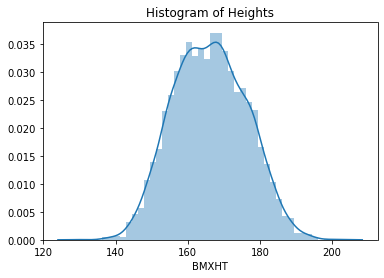

In [25]:
# Remove missing values in BMXHT
da_height = da[da['BMXHT'].notna()]

# Histogram


sns.distplot(a = da_height['BMXHT']).set_title('Histogram of Heights')
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

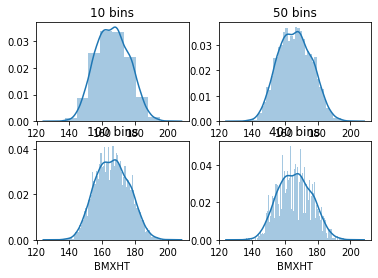

In [32]:
# set bins to different values

plt.subplot(2,2,1)
sns.distplot(a = da_height['BMXHT'], bins = 10).set_title('10 bins')

plt.subplot(2,2,2)
sns.distplot(a = da_height['BMXHT'], bins = 50).set_title('50 bins')

plt.subplot(2,2,3)
sns.distplot(a = da_height['BMXHT'], bins = 100).set_title('100 bins')

plt.subplot(2,2,4)
sns.distplot(a = da_height['BMXHT'], bins = 400).set_title('400 bins')

plt.show()

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

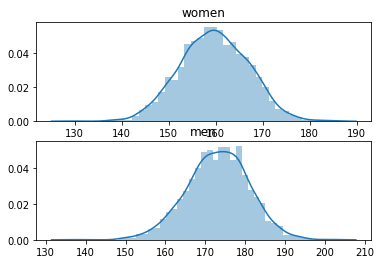

In [40]:
# Histogram for heights of women and men
plt.subplot(2,1,1)
sns.distplot(da_height.loc[(da_height['RIAGENDR'] == 2), ['BMXHT']]).set_title('women')  # for women

plt.subplot(2,1,2)
sns.distplot(da_height.loc[(da_height['RIAGENDR'] == 1), ['BMXHT']]).set_title('men')  # for men
plt.show()

C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


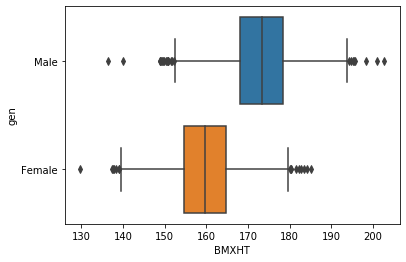

In [45]:
# Boxplot
da_height['gen'] = da_height.RIAGENDR.replace({1: 'Male', 2: 'Female'})
sns.boxplot(x = da_height['BMXHT'], y = da_height['gen'])
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

* It is easy to compare the boxplot and histogram. Answer is omitted.

# Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

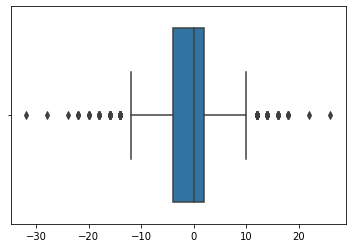

In [46]:
sns.boxplot(da['BPXSY2'] - da['BPXSY1'])
plt.show()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

* A lower SBP on the second reading means da['BPXSY2'] > da['BPXSY1'], or a negative value.
* The median is about 1, indicating that 50% of the subjects have a lower SBP.

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

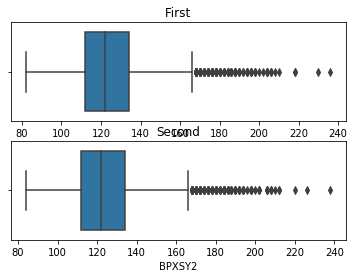

In [49]:
# Looks clearer in this way.
plt.subplot(2,1,1)
sns.boxplot(da['BPXSY1']).set_title('First')

plt.subplot(2,1,2)
sns.boxplot(da['BPXSY2']).set_title('Second')

plt.show()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

* Answer is omitted.

# Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [40]:
# check missing values
da.DMDEDUC2.value_counts(dropna = False)

array([ 5.,  3.,  4.,  2., nan,  1.,  9.])

In [57]:
# Remove missing values in DMDEDUC2
da_edu = da[da['DMDEDUC2'].notna()]

# Replace labels
label = {1: 'Less than 9th grade', 2: '9-11th grade', 3: 'High school graduate/GED or equivalent', 4: 'Some college or AA degree', 5: 'College graduate or above', 7: 'Refused', 9: 'Don\'t Know'}

da_edu['edu'] = da_edu.DMDEDUC2.replace(label)

C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [58]:
# frequency table
print(da_edu.groupby('edu')['DMDHHSIZ'].value_counts(normalize = True))

edu                                     DMDHHSIZ
9-11th grade                            2           0.222395
                                        3           0.163297
                                        4           0.152411
                                        5           0.146190
                                        1           0.116641
                                        6           0.113530
                                        7           0.085537
College graduate or above               2           0.347731
                                        3           0.193997
                                        4           0.165447
                                        1           0.142753
                                        5           0.095168
                                        6           0.029283
                                        7           0.025622
Don't Know                              2           0.666667
                                    

__Q5a.__ Comment on any major differences among the distributions.

* Answer is omitted.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [70]:
a = da_edu.loc[(da_edu['RIDAGEYR'] >= 30) & (da_edu['RIDAGEYR'] <= 40) & (da_edu['RIAGENDR'] == 2)]

nan
nan
nan
nan
nan
nan
nan


C:\Users\J\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [103]:
for i in label.keys():
    x = a[a['edu'] == label[i]].DMDHHSIZ.median()
    print('The median for', label[i], 'is', x)

The median for Less than 9th grade is 5.0
The median for 9-11th grade is 5.0
The median for High school graduate/GED or equivalent is 5.0
The median for Some college or AA degree is 4.0
The median for College graduate or above is 3.0
The median for Refused is nan
The median for Don't Know is nan


* We can see that there is no corresponding data for the last two types of education categories.

# Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

* Similar coding work to previous questions. Answer is omitted.